In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import sys
import os
from pathlib import Path
from importlib import reload

In [2]:
plt.style.use('dark_background')
#matplotlib.rcParams.keys()
plt.rcParams['figure.figsize'] = (10, 6)
plt.rc('font', size=12)
length = 8
width = 1.5
plt.rcParams['xtick.major.size'] = length
plt.rcParams['ytick.major.size'] = length
plt.rcParams['xtick.major.width'] = width
plt.rcParams['ytick.major.width'] = width

In [3]:
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces()
imgs = data.images
print(imgs.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\espov\scikit_learn_data
(400, 64, 64)


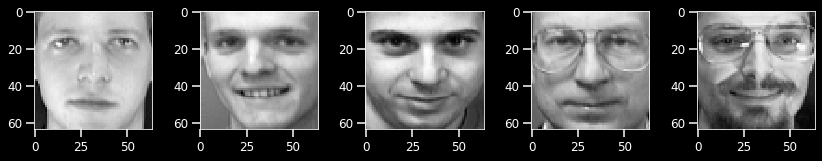

In [4]:
fig, axes = plt.subplots(1, 5, figsize=(14, 8))
plt.subplots_adjust(wspace=0.4)

for i in range(0, 5):
    axes[i].imshow(imgs[i*40], cmap='gray')

plt.show()

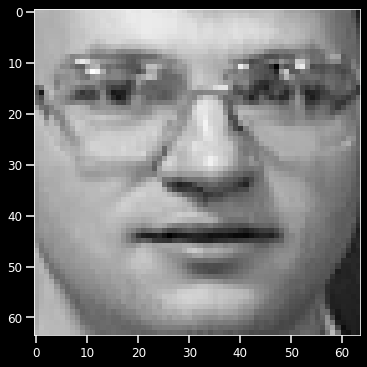

In [5]:
M = imgs.reshape((-1, imgs.shape[1]*imgs.shape[2])).T # matrix with flattend images along the column axis

x= np.zeros((400, 1))
x[50, 0] = 1
y = M @ x
plt.imshow(y.reshape((64,64)), cmap='gray')
plt.show()

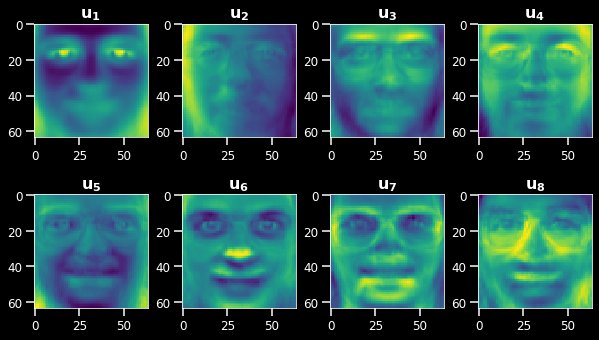

In [6]:
U, s, VT = np.linalg.svd(M)

fig, axes = plt.subplots(2, 4, figsize=(10,6))
plt.subplots_adjust(wspace=0.3, hspace=0.1)

for i in range(0, 8):
    axes[i // 4, i % 4].imshow(U[:, i].reshape((64,64)))
    axes[i // 4, i % 4].set_title("$\mathbf{{u_{0}}}$".format(i+1), fontsize=16)
    
plt.show()

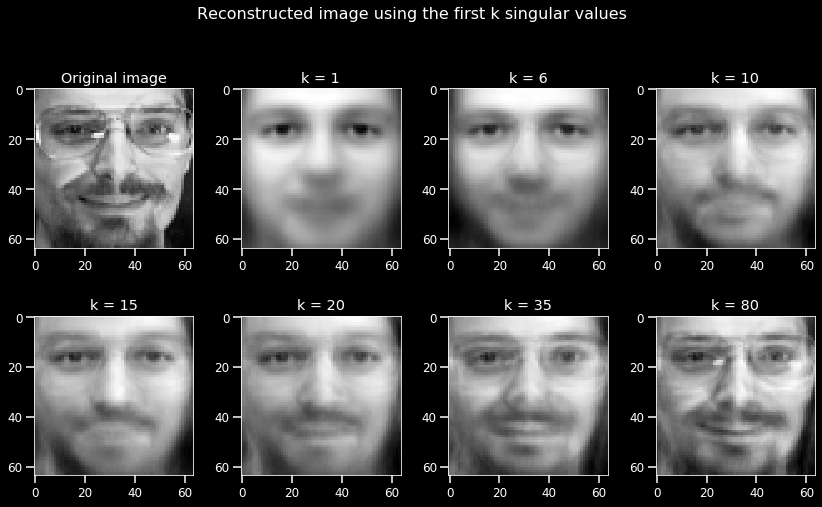

In [7]:
x= np.zeros((400, 1))
x[160, 0] = 1
Sigma = np.zeros((M.shape[0], M.shape[1]))
Sigma[:min(M.shape[0], M.shape[1]), :min(M.shape[0], M.shape[1])] = np.diag(s)

fig, axes = plt.subplots(2, 4, figsize=(14, 8))
fig.suptitle("Reconstructed image using the first k singular values", fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.1)

axes[0, 0].imshow(imgs[160], cmap='gray')
axes[0, 0].set_title("Original image")

k_list = [1, 6, 10, 15, 20, 35, 80]
for i in range(1, 8):
    # Reconstruction of the matrix using the first k singular values
    k = k_list[i-1] 
    mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :] @ x

    axes[i // 4, i % 4].imshow(mat_approx.reshape((64,64)), cmap='gray')
    axes[i // 4, i % 4].set_title("k = {}".format(k))

plt.show()